#### Lets load the packages we will be using throughout the notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset

In [2]:
df = pd.read_csv('bank-additional-full.csv',delimiter = ';')

#### Checking Data

In [3]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Lets get a rough baseline for comparison of the models we will be creating

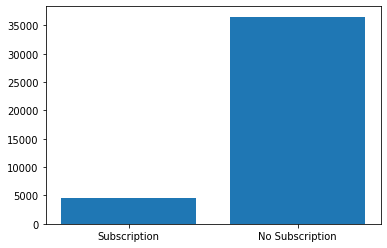

Total number of customers in dfset:  41188
Total number of subscribers to term deposit:  4640 (11.0% of customers)
Total number of non-subscribers to term deposit:  36548 (89.0% of customers)


In [5]:
total_entries = df.count()[0]
true_positives = df[df.y == 'yes'].count()[0]
positive_percent = round(true_positives / total_entries,2)
true_negatives = df[df.y == 'no'].count()[0]
negative_percent = round(true_negatives / total_entries,2)

yes_df = df[df.y == 'yes']
no_df = df[df.y == 'no']

labels = ['Subscription', 'No Subscription']

plt.figure()
plt.bar(labels,[true_positives,true_negatives])
plt.show()
print('Total number of customers in dfset: ', total_entries)
print('Total number of subscribers to term deposit: ', true_positives, f'({positive_percent * 100}% of customers)')
print('Total number of non-subscribers to term deposit: ', true_negatives,f'({negative_percent * 100}% of customers)')

#### CHeckng Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Analysis of Age column

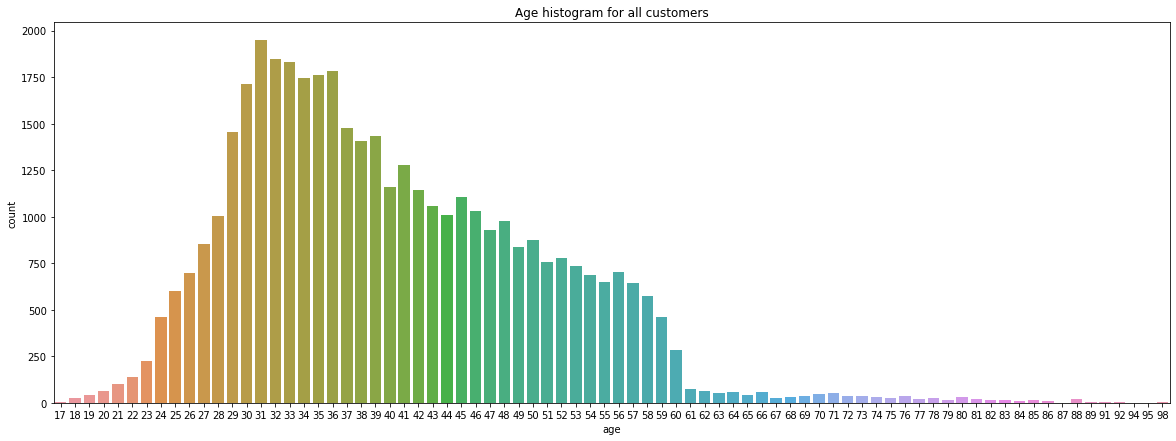

Ages greater than 69.5 are outliers


count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [7]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'age',data=df)
plt.title('Age histogram for all customers')
plt.show()

Q1 = df.age.describe()[4]
Q2 = df.age.describe()[5]
Q3 = df.age.describe()[6]
IQR = Q3 - Q1

print('Ages greater than', Q3 +1.5*IQR, 'are outliers' )

df.age.describe()

In [8]:
younger_mask = df.age <= 21
older_mask = df.age >= 60
middle_mask = (df.age > 21) & (df.age < 60)


df.age.loc[older_mask] = 2
df.age.loc[younger_mask] = 1
df.age.loc[middle_mask] = 0

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Analysis of pCampaign variable with Target variable

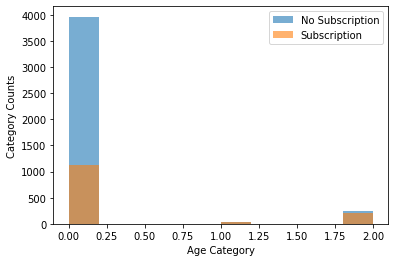

In [9]:
pCampaign = df[df.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').age.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Age Category')
plt.show()

As we can see, the same holds true for the results of the previos campaign

### Analysis of Jobs with Target variable

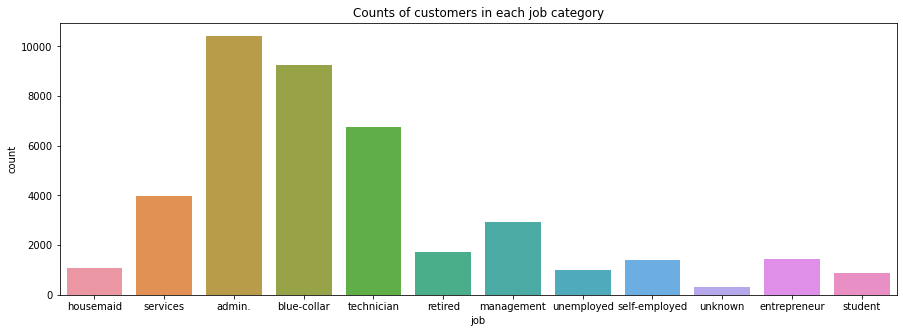

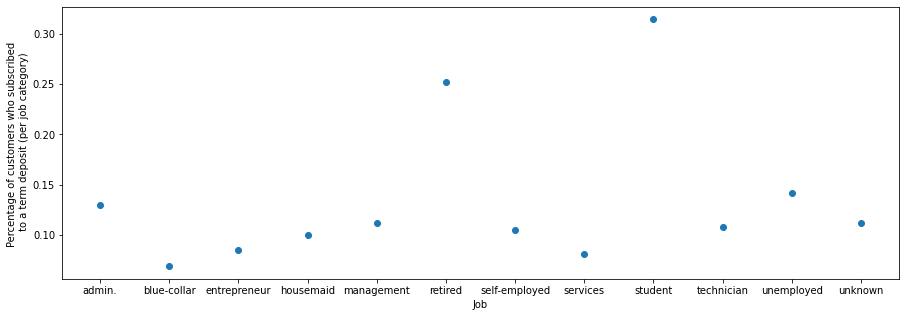

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=df)
plt.title('Counts of customers in each job category')
plt.show()

jobs = []
job_yes = []
job_no =[]
for job in np.unique(df.job):
        jobs.append(job)
        job_yes.append(df[(df.job == job) & (df.y == 'yes')].count()[0])
        job_no.append(df[(df.job == job) & (df.y == 'no')].count()[0])
job_totals = [a+b for a,b in zip(job_yes,job_no)]
job_ratio_yes = [a/b for a,b in zip(job_yes,job_totals)]

plt.figure(figsize = (15,5))
plt.scatter(jobs, job_ratio_yes)
plt.ylabel('Percentage of customers who subscribed \n to a term deposit (per job category)')
plt.xlabel('Job')
plt.show()

In [11]:
job_ratio_yes = np.array(job_ratio_yes)
high_ratio_jobs = []
mid_ratio_jobs = []
low_ratio_jobs = []
for index in range(len(job_ratio_yes)):
    ratio_value = job_ratio_yes[index]
    if ratio_value > 0.2:
        high_ratio_jobs.append(jobs[index])
    if (ratio_value <= 0.2) & (ratio_value > 0.1):
        mid_ratio_jobs.append(jobs[index])
    if ratio_value <= 0.1:
        low_ratio_jobs.append(jobs[index])

high_mask = df.job.isin(high_ratio_jobs)
mid_mask = df.job.isin(mid_ratio_jobs)
low_mask = df.job.isin(low_ratio_jobs)

df.job.loc[high_mask] = 2
df.job.loc[mid_mask] = 1
df.job.loc[low_mask] = 0

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


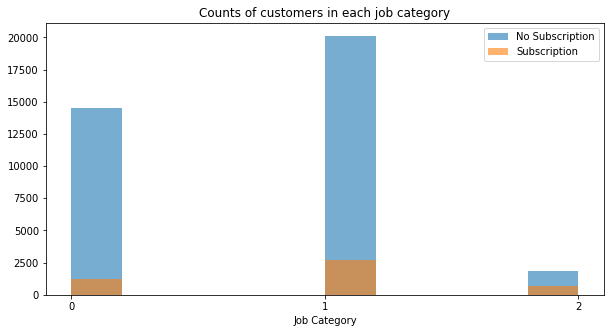

In [12]:
plt.figure(figsize=(10,5))
df.groupby('y').job.hist(grid = False,alpha = 0.6)
plt.title('Counts of customers in each job category')
plt.xlabel('Job Category')
plt.legend(['No Subscription','Subscription'])
plt.xticks([0,1,2])
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign.

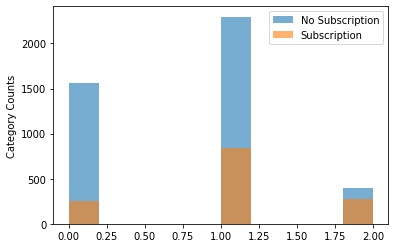

In [13]:
pCampaign = df[df.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').job.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel
('Job Category')
plt.show()

As we can see, the same holds true for the results of the previos campaign

### Analysis of Marital with Target variable

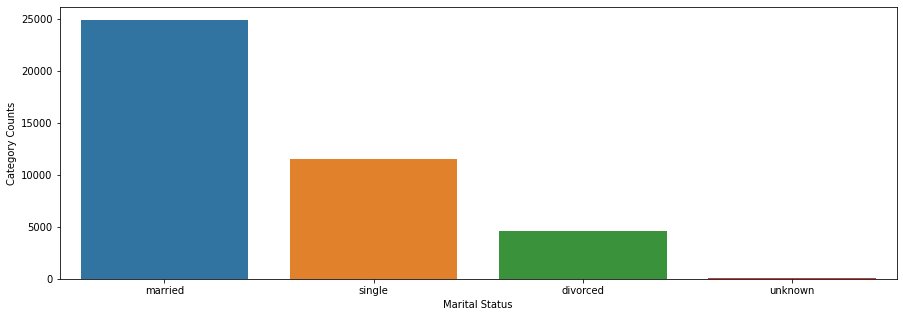

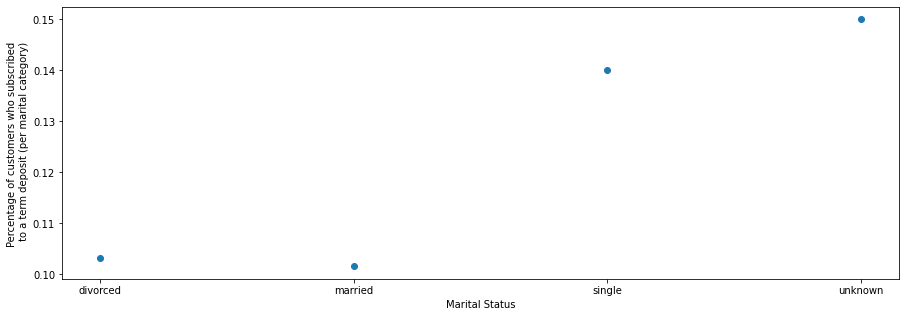

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital',data=df)
plt.xlabel('Marital Status')
plt.ylabel('Category Counts')
plt.show()


unique_marital = np.unique(df.marital)

marital_yes = []
marital_no = []

for marital in unique_marital:
    marital_yes.append(df[(df.marital == marital) & (df.y == 'yes')].count()[0])
    marital_no.append(df[(df.marital == marital) & (df.y == 'no')].count()[0])
marital_totals = [a + b for a,b in zip(marital_yes,marital_no)]
marital_ratio_yes = [a/b for a,b in zip(marital_yes,marital_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_marital, marital_ratio_yes)
plt.ylabel('Percentage of customers who subscribed \n to a term deposit (per marital category)')
plt.xlabel('Marital Status')
plt.show()

In [15]:
mask1 = df.marital.isin(['single','unknown'])
mask0 = df.marital.isin(['married','divorced'])

df.marital.loc[mask1] = 1
df.marital.loc[mask0] = 0

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


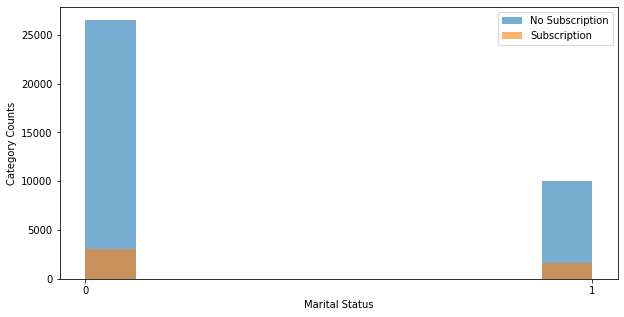

In [16]:
plt.figure(figsize =(10,5))
df.groupby('y').marital.hist(grid = False, alpha = 0.6)
plt.xticks([0,1])
plt.xlabel('Marital Status')
plt.ylabel('Category Counts')
plt.legend(['No Subscription', 'Subscription'])
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign

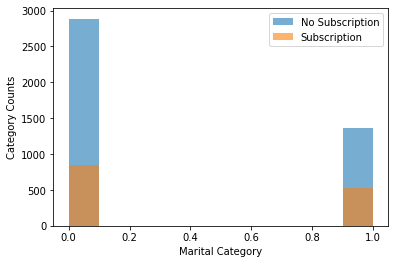

In [17]:
pCampaign = df[df.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').marital.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Marital Category')
plt.show()

As we can see, the same holds true for the results of the previos campaign


### Analysis of Education vs Target variable

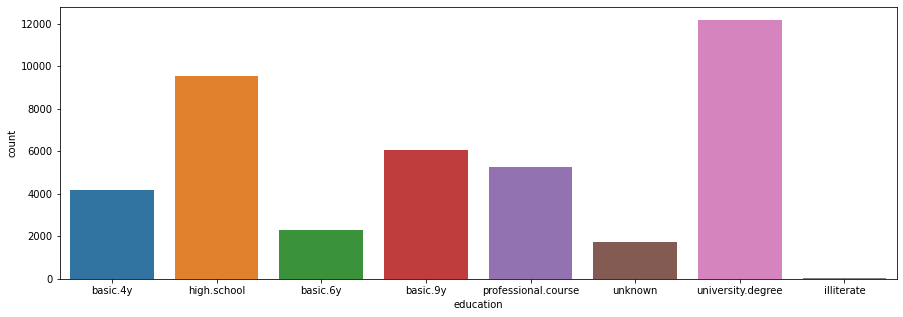

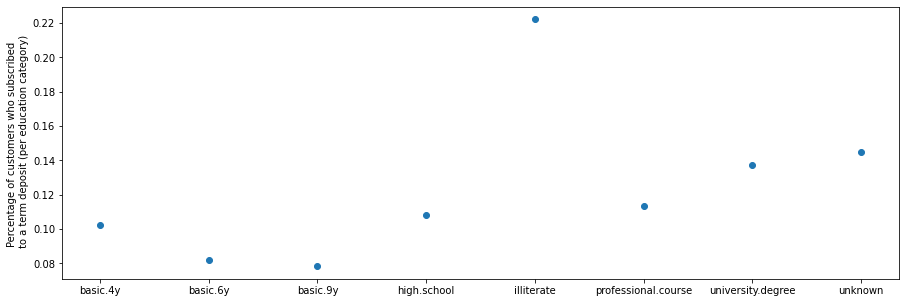

In [18]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'education', data = df)
plt.show()

unique_education = np.unique(df.education)

education_yes = []
education_no = []

for education in unique_education:
    education_yes.append(df[(df.education == education) & (df.y == 'yes')].count()[0])
    education_no.append(df[(df.education == education) & (df.y == 'no')].count()[0])
education_totals = [a + b for a,b in zip(education_yes,education_no)]
education_ratio_yes = [a/b for a,b in zip(education_yes,education_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_education, education_ratio_yes)
plt.ylabel('Percentage of customers who subscribed \n to a term deposit (per education category)')
plt.show()

In [19]:
upper_edu = []
lower_edu = []

for index in range(len(unique_education)):
    if education_ratio_yes[index] > 0.1:
        upper_edu.append(unique_education[index])
    if education_ratio_yes[index] <= 0.1:
        lower_edu.append(unique_education[index])

mask1 = df.education.isin(upper_edu)
mask0 = df.education.isin(lower_edu)

df.education.loc[mask1] = 1
df.education.loc[mask0] = 0


C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Lets take a look at the education variable after transformation

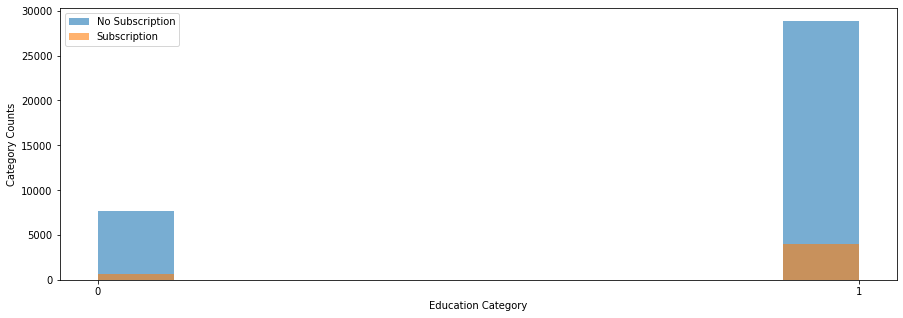

In [20]:
plt.figure(figsize = (15,5))
df.groupby('y').education.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.xlabel('Education Category')
plt.ylabel('Category Counts')
plt.xticks([0,1])
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign.

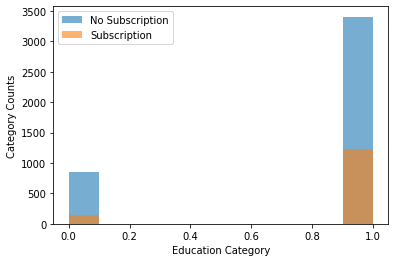

In [21]:
pCampaign = df[df.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').education.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Education Category')
plt.show()

As we can see, the same holds true for the results of the previos campaign

### Analysis of Default vs Target variable


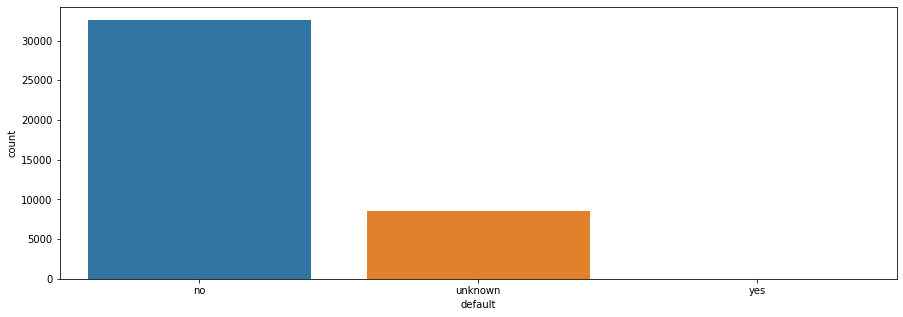

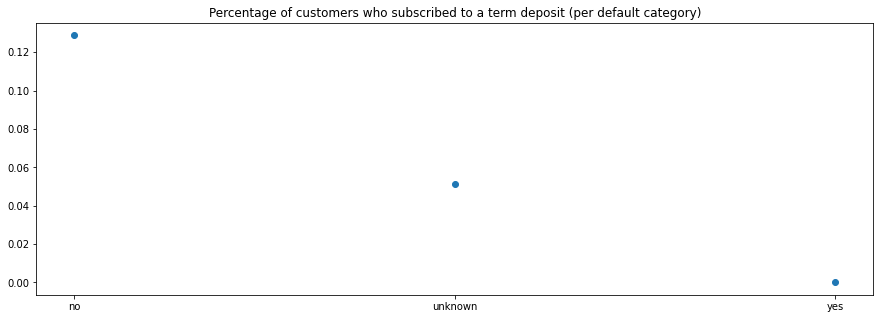

In [22]:
plt.figure(figsize = (15,5))
sns.countplot(x='default',data=df)
plt.show()

unique_default = np.unique(df.default)

default_yes = []
default_no = []

for default in unique_default:
    default_yes.append(df[(df.default == default) & (df.y == 'yes')].count()[0])
    default_no.append(df[(df.default == default) & (df.y == 'no')].count()[0])
default_totals = [a + b for a,b in zip(default_yes,default_no)]
default_ratio_yes = [a/b for a,b in zip(default_yes,default_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_default, default_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per default category)')
plt.show()

In [23]:
df.default.loc[df.default == 'no'] = 1
df.default.loc[df.default == 'unknown'] = 0
df.default.loc[df.default == 'yes'] = 0

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Lets take a look at the Default variable after transformation

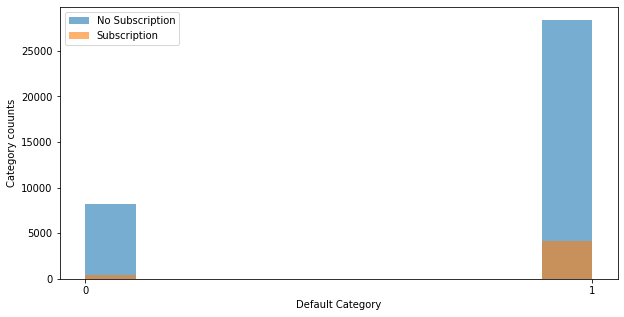

In [24]:
plt.figure(figsize = (10,5))
df.groupby('y').default.hist(grid = False,alpha = 0.6)
plt.xticks([0,1])
plt.legend(['No Subscription','Subscription'])
plt.xlabel('Default Category')
plt.ylabel('Category couunts')
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign.

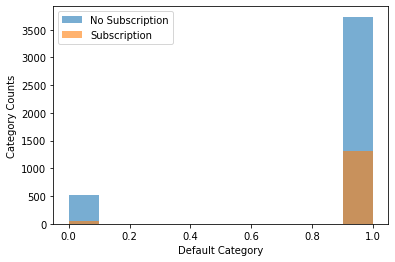

In [25]:
pCampaign = df[df.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').default.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Default Category')
plt.show()

As we can see, the same holds true for the results of the previos campaign


### Analysis Housing vs Target Variable


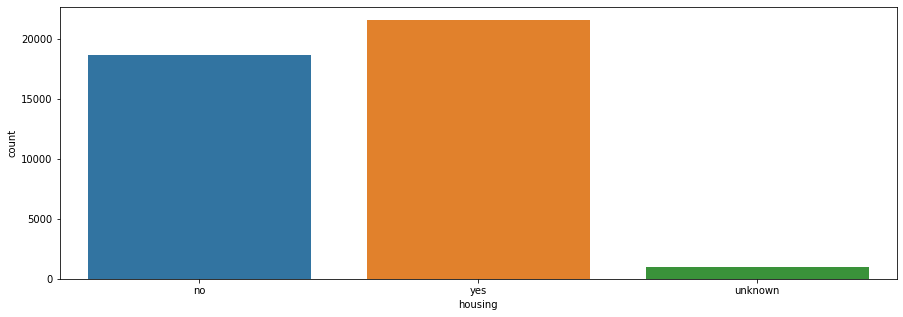

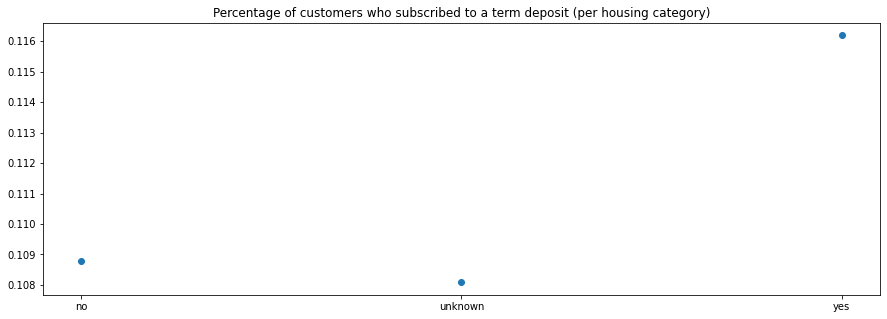

In [26]:
plt.figure(figsize = (15,5))
sns.countplot(x='housing',data=df)
plt.show()

unique_housing = np.unique(df.housing)

housing_yes = []
housing_no = []

for housing in unique_housing:
    housing_yes.append(df[(df.housing == housing) & (df.y == 'yes')].count()[0])
    housing_no.append(df[(df.housing == housing) & (df.y == 'no')].count()[0])
housing_totals = [a + b for a,b in zip(housing_yes,housing_no)]
housing_ratio_yes = [a/b for a,b in zip(housing_yes,housing_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_housing, housing_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per housing category)')
plt.show()

In [27]:
df = df.drop(labels = 'housing', axis = 1)

In [28]:
df

,age,job,marital,education,default,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,1,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,1,0,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,0,0,0,1,1,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,0,1,0,0,1,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,0,0,0,1,1,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2,2,0,1,1,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,0,0,0,1,1,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,0,2,0,1,1,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,0,1,0,1,1,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes



### Analysing Loan variable vs Target variable


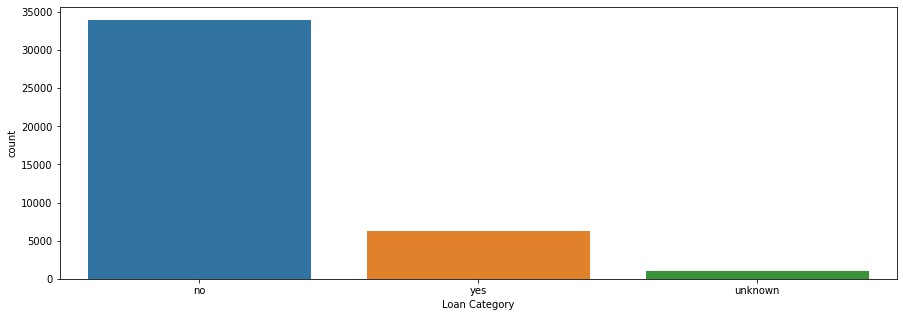

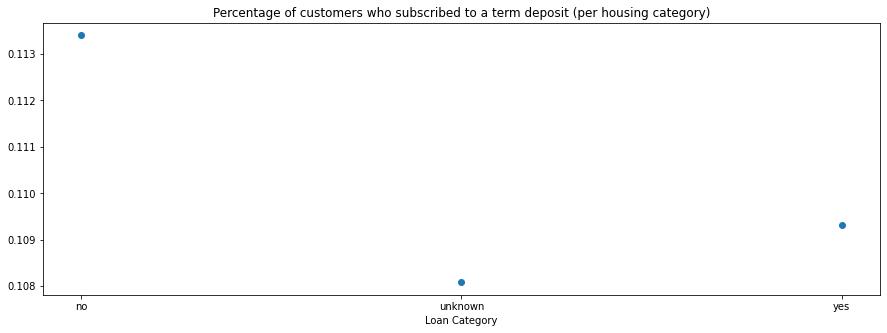

In [29]:
plt.figure(figsize = (15,5))
sns.countplot(x='loan',data=df)
plt.xlabel('Loan Category')
plt.show()

unique_loan = np.unique(df.loan)

loan_yes = []
loan_no = []

for loan in unique_loan:
    loan_yes.append(df[(df.loan == loan) & (df.y == 'yes')].count()[0])
    loan_no.append(df[(df.loan == loan) & (df.y == 'no')].count()[0])
loan_totals = [a + b for a,b in zip(loan_yes,loan_no)]
loan_ratio_yes = [a/b for a,b in zip(loan_yes,loan_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_loan, loan_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per housing category)')
plt.xlabel('Loan Category')
plt.show()

In [30]:
df = df.drop(labels = 'loan', axis = 1)

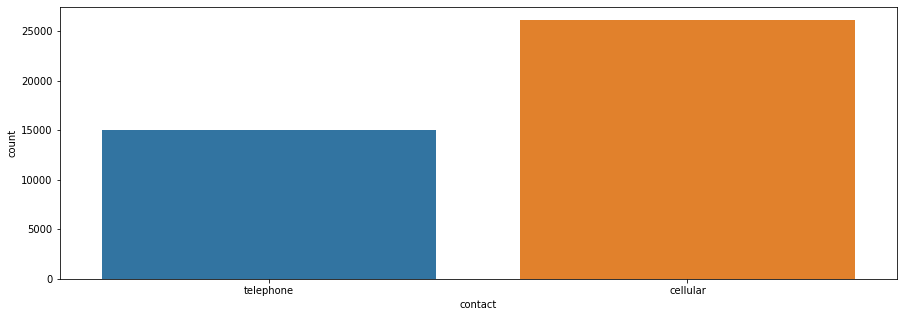

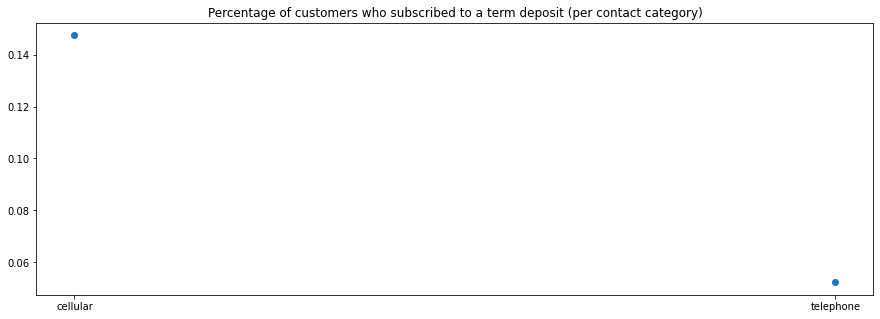

In [31]:
plt.figure(figsize = (15,5))
sns.countplot(x='contact',data=df)
plt.show()

unique_contact = np.unique(df.contact)

contact_yes = []
contact_no = []

for contact in unique_contact:
    contact_yes.append(df[(df.contact == contact) & (df.y == 'yes')].count()[0])
    contact_no.append(df[(df.contact == contact) & (df.y == 'no')].count()[0])
contact_totals = [a + b for a,b in zip(contact_yes,contact_no)]
contact_ratio_yes = [a/b for a,b in zip(contact_yes,contact_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_contact, contact_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per contact category)')
plt.show()

In [32]:
df.contact.loc[df.contact == 'cellular'] = 1
df.contact.loc[df.contact == 'telephone'] = 0

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


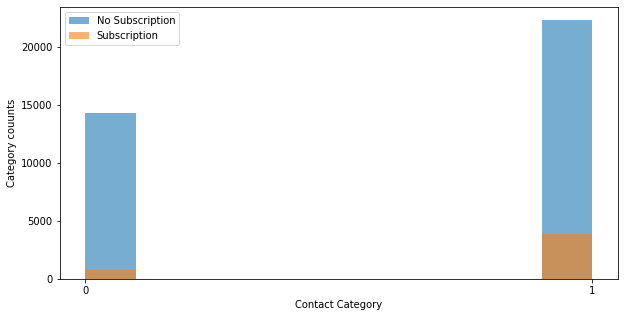

In [33]:
plt.figure(figsize = (10,5))
df.groupby('y').contact.hist(grid = False,alpha = 0.6)
plt.xticks([0,1])
plt.legend(['No Subscription','Subscription'])
plt.xlabel('Contact Category')
plt.ylabel('Category couunts')
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign.

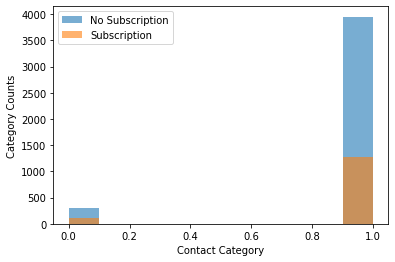

In [34]:
pCampaign = df[df.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').contact.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Contact Category')
plt.show()

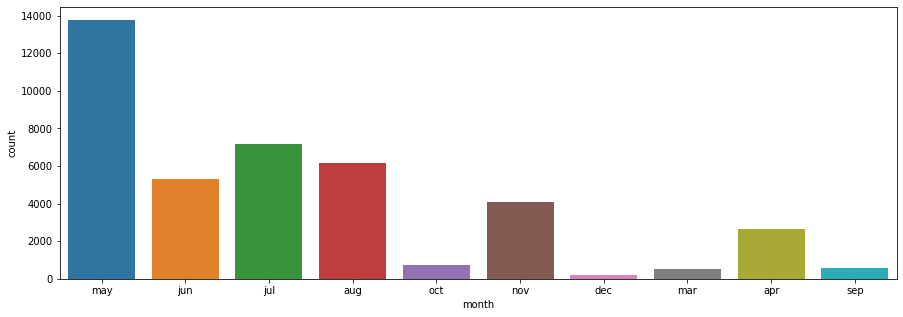

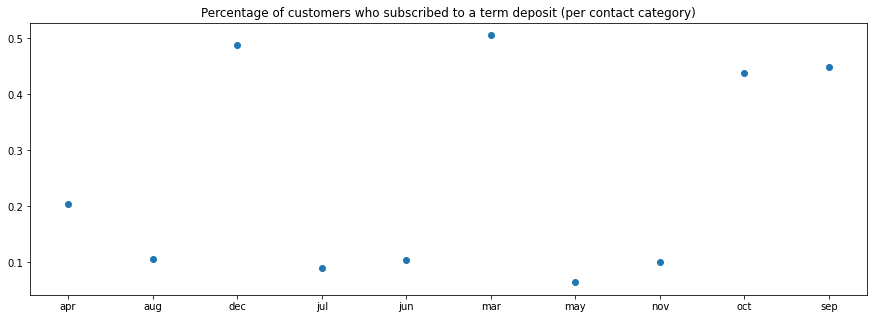

In [35]:
plt.figure(figsize = (15,5))
sns.countplot(x='month',data=df)
plt.show()

unique_month = np.unique(df.month)

month_yes = []
month_no = []

for month in unique_month:
    month_yes.append(df[(df.month == month) & (df.y == 'yes')].count()[0])
    month_no.append(df[(df.month == month) & (df.y == 'no')].count()[0])
month_totals = [a + b for a,b in zip(month_yes,month_no)]
month_ratio_yes = [a/b for a,b in zip(month_yes,month_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_month, month_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per contact category)')
plt.show()

In [36]:
mask1 = df.month.isin(['dec','mar','oct','sep'])
mask0 = df.month.isin(['apr','aug','jul','jun','may','nov'])

df.month.loc[mask1] = 1
df.month.loc[mask0] = 0

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


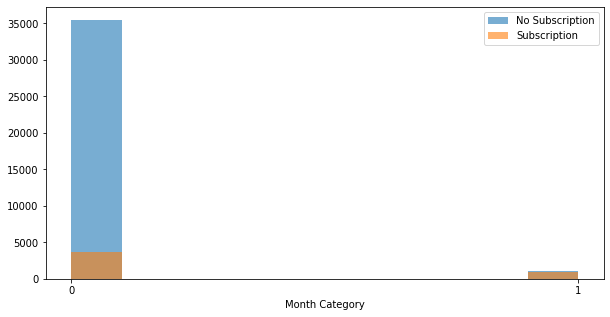

In [37]:
plt.figure(figsize = (10,5))
df.groupby('y').month.hist(grid = False, alpha = 0.6)
plt.xlabel('Month Category')
plt.legend(['No Subscription','Subscription'])
plt.xticks([0,1])
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign

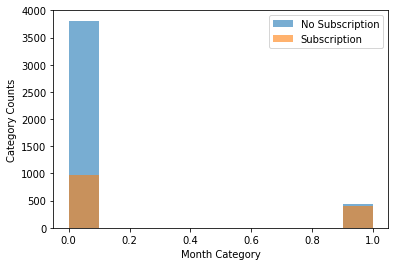

In [38]:
pCampaign = df[df.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').month.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Month Category')
plt.show()

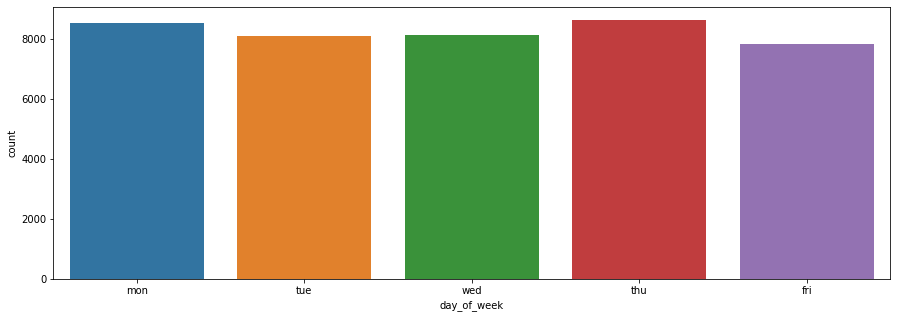

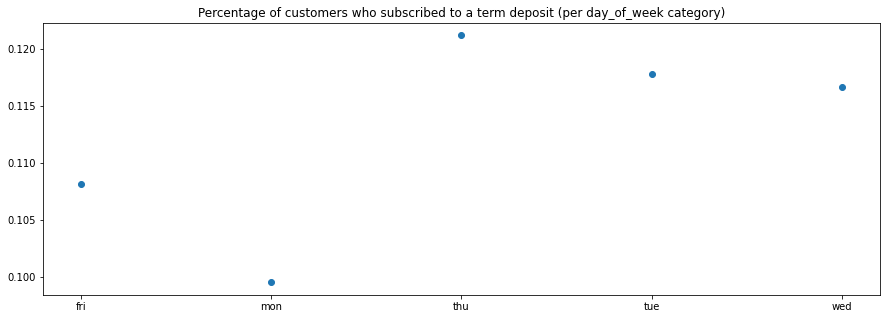

In [39]:
plt.figure(figsize = (15,5))
sns.countplot(x='day_of_week',data=df)
plt.show()

unique_day_of_week = np.unique(df.day_of_week)

day_of_week_yes = []
day_of_week_no = []

for day_of_week in unique_day_of_week:
    day_of_week_yes.append(df[(df.day_of_week == day_of_week) & (df.y == 'yes')].count()[0])
    day_of_week_no.append(df[(df.day_of_week == day_of_week) & (df.y == 'no')].count()[0])
day_of_week_totals = [a + b for a,b in zip(day_of_week_yes,day_of_week_no)]
day_of_week_ratio_yes = [a/b for a,b in zip(day_of_week_yes,day_of_week_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_day_of_week, day_of_week_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per day_of_week category)')
plt.show()

In [40]:
df = df.drop(labels='day_of_week',axis = 1)

In [41]:
df

,age,job,marital,education,default,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,1,0,0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,1,0,0,0,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,0,0,0,1,1,0,0,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,0,1,0,0,1,0,0,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,0,0,0,1,1,0,0,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2,2,0,1,1,1,0,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,0,0,0,1,1,1,0,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,0,2,0,1,1,1,0,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,0,1,0,1,1,1,0,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [42]:
df = df.drop(labels = 'duration', axis = 1)

In [43]:
df

,age,job,marital,education,default,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,1,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,0,0,0,1,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,0,1,0,0,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,0,0,0,1,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2,2,0,1,1,1,0,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,0,0,0,1,1,1,0,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,0,2,0,1,1,1,0,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,0,1,0,1,1,1,0,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [44]:
df.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

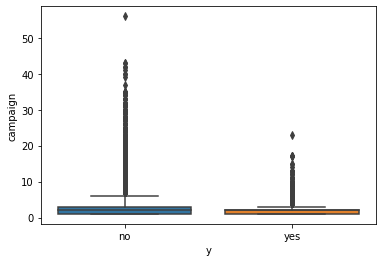

Outliers are greater than 6.0


In [45]:
Q1 = df.campaign.describe()[4]
Q3 = df.campaign.describe()[6]
IQR = Q3 - Q1

sns.boxplot(x = 'y',y = 'campaign', data = df)
plt.show()

print('Outliers are greater than', Q3 + 1.5 * IQR)

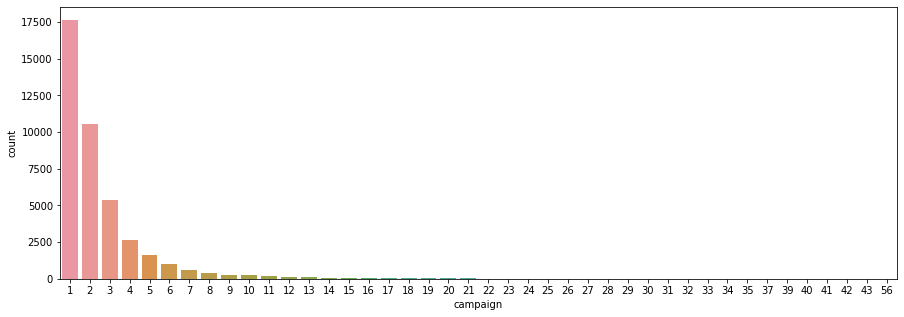

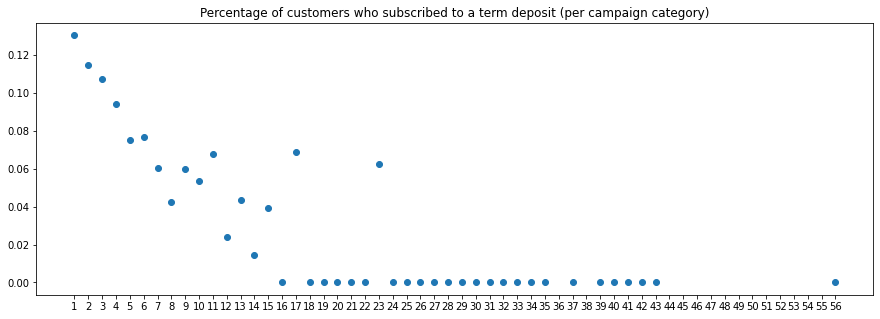

In [46]:
plt.figure(figsize = (15,5))
sns.countplot(x='campaign',data=df)
plt.show()

unique_campaign = np.unique(df.campaign)

campaign_yes = []
campaign_no = []

for campaign in unique_campaign:
    campaign_yes.append(df[(df.campaign == campaign) & (df.y == 'yes')].count()[0])
    campaign_no.append(df[(df.campaign == campaign) & (df.y == 'no')].count()[0])
campaign_totals = [a + b for a,b in zip(campaign_yes,campaign_no)]
campaign_ratio_yes = [a/b for a,b in zip(campaign_yes,campaign_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_campaign,campaign_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per campaign category)')
plt.xticks(list(range(1,57)))
plt.show()

In [47]:
df = df.drop(labels = 'campaign', axis = 1)

In [48]:
df

,age,job,marital,education,default,contact,month,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,1,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,1,0,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,0,0,0,1,1,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,0,1,0,0,1,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,0,0,0,1,1,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2,2,0,1,1,1,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,0,0,0,1,1,1,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,0,2,0,1,1,1,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,0,1,0,1,1,1,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [49]:
df.pdays.loc[df.pdays == 999] = -1

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


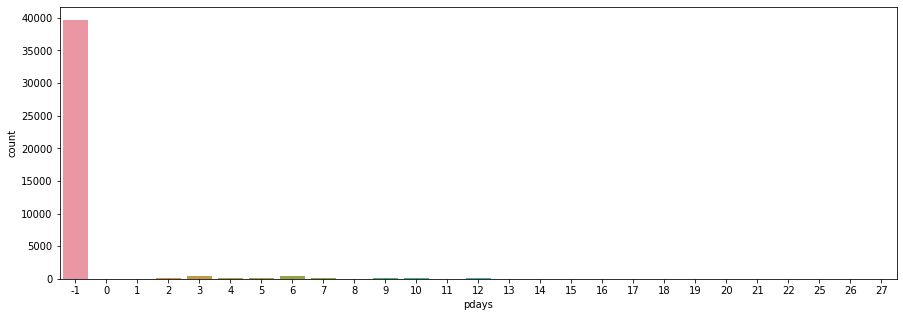

Lets take a look at the same graph but zoomed in to see how many customers there are in the other pdays category


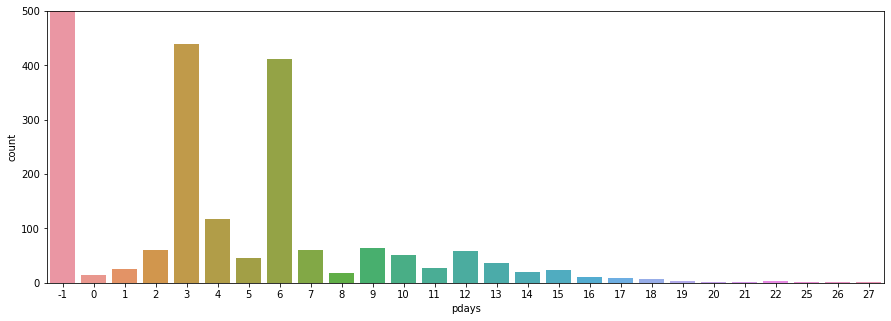

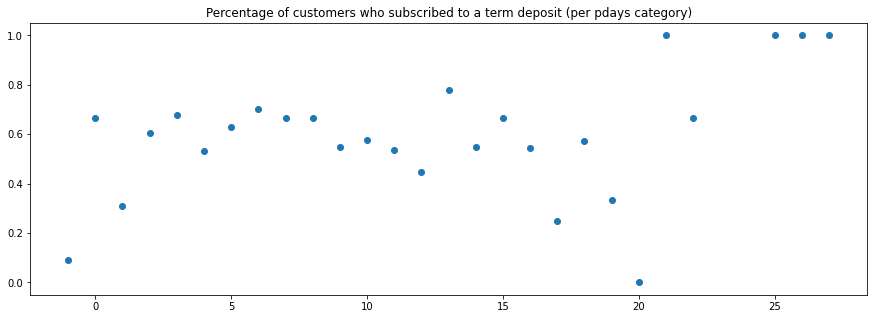

In [50]:
plt.figure(figsize = (15,5))
sns.countplot(x='pdays',data=df)
plt.show()

print('Lets take a look at the same graph but zoomed in to see how many customers there are in the other pdays category')

plt.figure(figsize = (15,5))
sns.countplot(x='pdays',data=df)
plt.ylim(0,500)
plt.show()

unique_pdays = np.unique(df.pdays)

pdays_yes = []
pdays_no = []

for pdays in unique_pdays:
    pdays_yes.append(df[(df.pdays == pdays) & (df.y == 'yes')].count()[0])
    pdays_no.append(df[(df.pdays == pdays) & (df.y == 'no')].count()[0])
pdays_totals = [a + b for a,b in zip(pdays_yes,pdays_no)]
pdays_ratio_yes = [a/b for a,b in zip(pdays_yes,pdays_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_pdays,pdays_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per pdays category)')
plt.show()

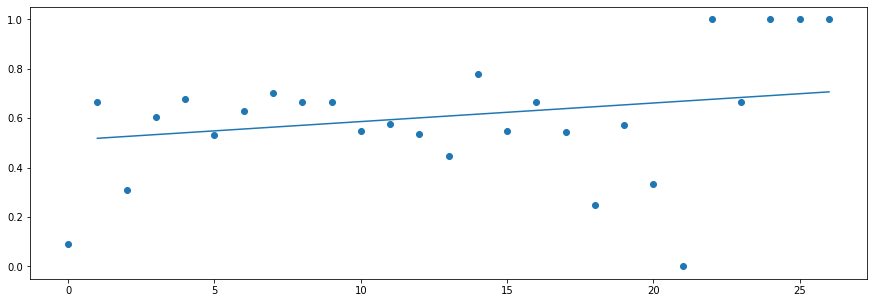

In [51]:
x = list(range(1,27))
z = np.polyfit(x,pdays_ratio_yes[1:],1)
y = z[1] + np.multiply(x,z[0])
plt.figure(figsize = (15,5))
plt.plot(x,y)
plt.scatter(list(range(0,27)),pdays_ratio_yes)

We will drop this column from the dfset

In [52]:
df = df.drop(labels = 'pdays',axis = 1)

In [53]:
df

,age,job,marital,education,default,contact,month,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,1,0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,1,0,0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,0,0,0,1,1,0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,0,1,0,0,1,0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,0,0,0,1,1,0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2,2,0,1,1,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,0,0,0,1,1,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,0,2,0,1,1,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,0,1,0,1,1,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


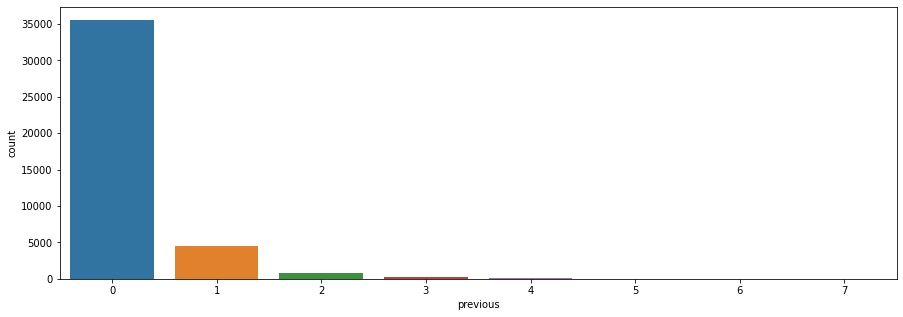

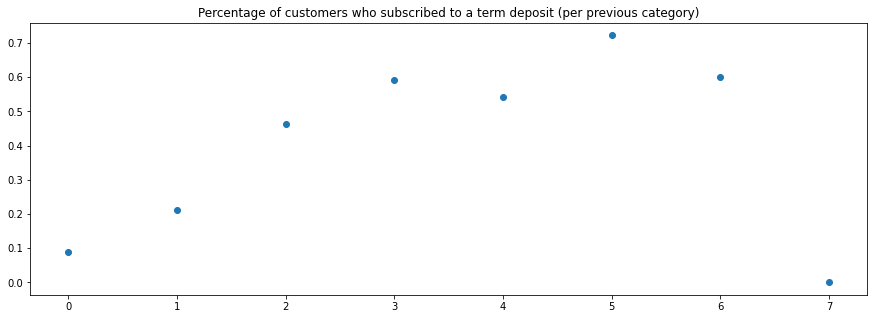

In [54]:
plt.figure(figsize = (15,5))
sns.countplot(x='previous',data=df)
plt.show()

unique_previous = np.unique(df.previous)

previous_yes = []
previous_no = []

for previous in unique_previous:
    previous_yes.append(df[(df.previous == previous) & (df.y == 'yes')].count()[0])
    previous_no.append(df[(df.previous == previous) & (df.y == 'no')].count()[0])
previous_totals = [a + b for a,b in zip(previous_yes,previous_no)]
previous_ratio_yes = [a/b for a,b in zip(previous_yes,previous_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_previous,previous_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per previous category)')
plt.show()

In [55]:
df.previous.loc[df.previous.isin([0,1,7])] = 0
df.previous.loc[df.previous.isin([2,3,4,5,6])] = 1

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Let's take a look at the variable after transformation

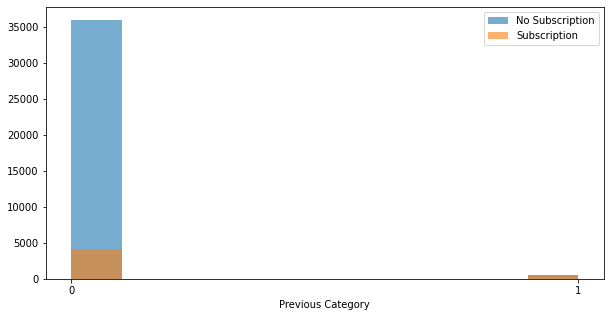

In [56]:
plt.figure(figsize = (10,5))
df.groupby('y').previous.hist(grid = False, alpha = 0.6)
plt.xlabel('Previous Category')
plt.legend(['No Subscription','Subscription'])
plt.xticks([0,1])
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign.

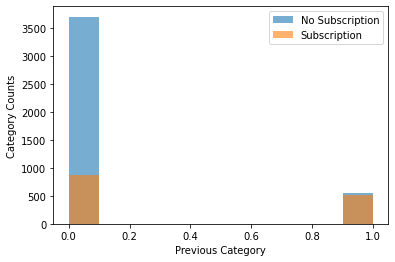

In [57]:
pCampaign = df[df.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').previous.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Previous Category')
plt.show()

In [58]:
mask1 = df.poutcome == 'success'
mask0 = df.poutcome.isin(['failure','nonexistent'])

df.poutcome.loc[mask1] =1 
df.poutcome.loc[mask0] =0 
df

,age,job,marital,education,default,contact,month,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,1,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,1,0,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,0,0,0,1,1,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,0,1,0,0,1,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,0,0,0,1,1,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2,2,0,1,1,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,0,0,0,1,1,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,0,2,0,1,1,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,0,1,0,1,1,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Now all of our df is transformed and we have learned some insights from our exploratory df analysis.

In [59]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = label_encoder.fit_transform(df[i])


## Data Scaling

#### Some of the models we will be using perform better when df is normalized so lets do that now

In [60]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#### Convert the label for y from string to int

In [61]:
mask0 = df.y == 'no'
mask1 = df.y == 'yes'

# convert the label for y from string to int
df.y.loc[mask0] = 0
df.y.loc[mask1] = 1

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Split the df into train and test 

In [62]:
Y = df.y
X = df.drop(labels = 'y',axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

#### Rescale the df

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Data Balancing

Because our original dfset is very imbalanced:
- Class 0: 89%
- Class 1: 11%

We will try a resampling method to balance out the classes. We will essentialy be undersampling the majority class and over sampling the minority class. Additionally, points will be removed as needed if they are Tomek links.

In [64]:
from imblearn.combine import SMOTETomek
from collections import Counter



In [65]:
sm = SMOTETomek(random_state = 1)
X_res, Y_res = sm.fit_resample(X_train_scaled, Y_train)

In [66]:
print('Class 0: ', Counter(Y_res)[0])
print('Class 1: ', Counter(Y_res)[1])

Class 0:  27202
Class 1:  27202



## Machine Learning Models

In [67]:
from sklearn.metrics import plot_roc_curve
import pickle
from sklearn.model_selection import cross_val_score


### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#### Set up the parameters for the Random Grid Search with Cross Validation

In [69]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [70]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, scoring = 'recall',cv = 5, verbose=2, random_state=1, n_jobs = -1)

#### Lets try using the original (Not the resampled) df

In [71]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=1, scoring='recall', verbose=2)

In [72]:
rf_random.best_params_

{'n_estimators': 644,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 110,
 'bootstrap': True}

In [73]:
from sklearn.utils.multiclass import type_of_target
type_of_target(Y_test)

'binary'

In [74]:
Y_test = label_encoder.fit_transform(Y_test)
Y_train = label_encoder.fit_transform(Y_train)

In [75]:
best_rf = rf_random.best_estimator_
predictions_rf = best_rf.predict(X_test)
print(classification_report(Y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9132
           1       0.55      0.29      0.38      1165

    accuracy                           0.89     10297
   macro avg       0.73      0.63      0.66     10297
weighted avg       0.87      0.89      0.88     10297



#### Now lets try using the resampled df

In [76]:
rf = RandomForestClassifier()
rf_res_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, scoring = 'recall',cv = 5, verbose=2, random_state=1, n_jobs = -1)

In [77]:
rf_res_random.fit(X_res,Y_res)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=1, scoring='recall', verbose=2)

In [78]:
rf_res_random.best_params_

{'n_estimators': 377,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 70,
 'bootstrap': True}

In [79]:
best_res_rf = rf_res_random.best_estimator_
predictions_res_rf = best_res_rf.predict(X_test_scaled)
print(classification_report(Y_test,predictions_res_rf))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      9132
           1       0.38      0.51      0.43      1165

    accuracy                           0.85     10297
   macro avg       0.66      0.70      0.67     10297
weighted avg       0.87      0.85      0.86     10297




### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegressionCV

#### Original df - No Resampling

In [81]:
lr_clf = LogisticRegressionCV(max_iter = 3000,random_state = 1)

lr_clf.fit(X_train_scaled,Y_train)

print(classification_report(Y_test, lr_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      9132
           1       0.66      0.20      0.30      1165

    accuracy                           0.90     10297
   macro avg       0.78      0.59      0.62     10297
weighted avg       0.88      0.90      0.87     10297



#### Resampled df

In [82]:
lr_res_clf = LogisticRegressionCV(max_iter = 3000, random_state = 1)

lr_res_clf.fit(X_res,Y_res)

print(classification_report(Y_test, lr_res_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      9132
           1       0.31      0.69      0.43      1165

    accuracy                           0.79     10297
   macro avg       0.63      0.75      0.65     10297
weighted avg       0.88      0.79      0.82     10297



#### Notes on Logistic Regression Models:  
- Logistic Regression (original df):
    - Accuracy 90%
    - Recall (True Positive Rate) 20%  
    - Precision (Positive Predictive Value) 64%
- Logisitc Regression (resampled df):
    - Accuracy 79%
    - Recall (True Positive Rate) 69%
    - Precision (Positive Predictive Value) 31%


### Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,Y_train)
print(classification_report(Y_test,gb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9132
           1       0.65      0.23      0.34      1165

    accuracy                           0.90     10297
   macro avg       0.78      0.61      0.64     10297
weighted avg       0.88      0.90      0.88     10297



In [85]:
gb_res_clf = GradientBoostingClassifier()
gb_res_clf.fit(X_res,Y_res)
print(classification_report(Y_test,gb_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75      9132
           1       0.20      0.74      0.32      1165

    accuracy                           0.64     10297
   macro avg       0.58      0.68      0.54     10297
weighted avg       0.87      0.64      0.70     10297



C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"



### XGBoost

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb_clf = XGBClassifier(seed = 1)
xgb_clf.fit(X_train,Y_train)
print(classification_report(Y_test,xgb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9132
           1       0.60      0.29      0.39      1165

    accuracy                           0.90     10297
   macro avg       0.75      0.63      0.67     10297
weighted avg       0.88      0.90      0.88     10297



In [88]:
xgb_res_clf = XGBClassifier(seed = 1)
xgb_res_clf.fit(X_res,Y_res)
print(classification_report(Y_test,xgb_res_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      9132
           1       0.44      0.55      0.49      1165

    accuracy                           0.87     10297
   macro avg       0.69      0.73      0.71     10297
weighted avg       0.88      0.87      0.88     10297



In [89]:
# Put models in a dictionary
models = {"Random Forest (original)": rf_random,
          "Random Forest (resampled)": rf_res_random,
          "Logistic Regression (original)": lr_clf,
          "Logistic Regression (resampled)": lr_res_clf,
          "GBoost (original)": gb_clf,
          "GBoost (resampled)": gb_res_clf,
          "XGBoost (original)": xgb_clf,
          "XGBoost (resampled)": xgb_res_clf}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training df (no labels)
    X_test : testing df (no labels)
    y_train : training labels
    y_test : test labels
    """
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [90]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_scaled,
                             X_test=X_test_scaled,
                             y_train=Y_train,
                             y_test=Y_test)
model_scores

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


{'Random Forest (original)': 0.6025751072961374,
 'Random Forest (resampled)': 0.511587982832618,
 'Logistic Regression (original)': 0.8977372050111683,
 'Logistic Regression (resampled)': 0.7942119063804992,
 'GBoost (original)': 0.6378556861221715,
 'GBoost (resampled)': 0.8459745556958337,
 'XGBoost (original)': 0.634845100514713,
 'XGBoost (resampled)': 0.8684082742546373}

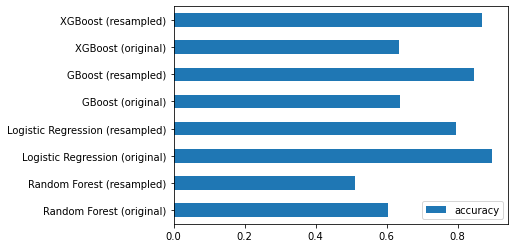

In [92]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.barh();

<a id='ME'></a>

### Model Evaluation (Reciever Operator Characteristic Curve & Area Under Curve)

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve`

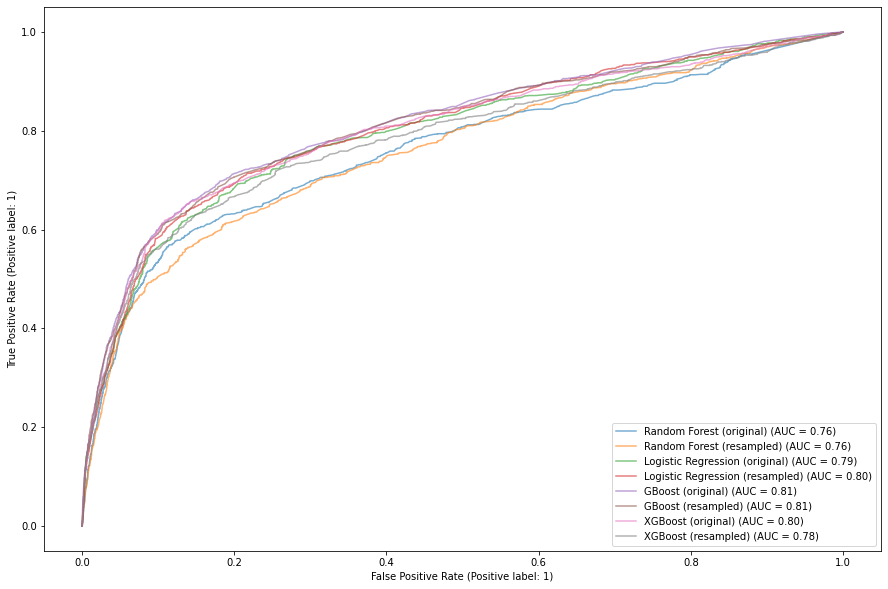

In [93]:
fig = plt.figure(figsize =(15,10))
ax = fig.gca()
plot_roc_curve(rf_random,X_test, Y_test,ax = ax, name = 'Random Forest (original)', alpha = 0.6)
plot_roc_curve(rf_res_random,X_test_scaled, Y_test,ax = ax, name = 'Random Forest (resampled)', alpha = 0.6)

plot_roc_curve(lr_clf,X_test_scaled, Y_test,ax = ax, name = 'Logistic Regression (original)', alpha = 0.6)
plot_roc_curve(lr_res_clf,X_test_scaled, Y_test,ax = ax, name = 'Logistic Regression (resampled)', alpha = 0.6)

plot_roc_curve(gb_clf,X_test, Y_test,ax = ax, name = 'GBoost (original)', alpha = 0.6)
plot_roc_curve(gb_res_clf,X_test_scaled, Y_test,ax = ax, name = 'GBoost (resampled)', alpha = 0.6)

plot_roc_curve(xgb_clf,X_test, Y_test,ax = ax, name = 'XGBoost (original)', alpha = 0.6)
plot_roc_curve(xgb_res_clf,X_test_scaled, Y_test,ax = ax, name = 'XGBoost (resampled)', alpha = 0.6)

<a id='R&I'></a>
#### Reccomnedations & Insights

- The bank could benefit from increased marketing towards individuals of ages 17-21 & greater than 60
- Students are ~30% likely to subscribe to a term deposit
- Retirees are ~25% likely to subscribe to a term deposit
- Customers whose marital status is unknown or single are more likely to subscribe to a term deposit
- Customers with no loans in default are more likely to subscribe to a term deposit
- When contacting customers, cellular communication works best
- Marketing campaigns should be concentrated in the months of Mar, Sep, Oct, Dec

Using targeted marketing, this bank should work to reach new customers using the insights from above. This list of customers can then be filtered using the classifier we have built in this notebook to yield maximum results and increase revenues through term deposits with minimal overhead and increased efficiency.